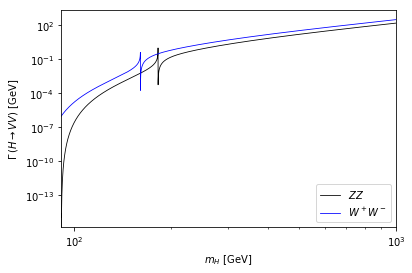

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#Fermi constant 
G_F = 1.16637e-5

# Masses of particles
m_W = 80.398
m_Z = 91.1876
m_c = 1.40
m_b = 4.75
m_t = 172.5
m_tau = 1.777

#Weinberg Angle
c_W = m_W/m_Z

#sine of Weinberg angle
s_W = np.sqrt(1 - c_W**2)    
    
#Weak coupling constant
alpha = (np.sqrt(2)/np.pi) * G_F * m_W**2 * s_W**2    
    
#Elementary charge in natural units and weak couplings for W and Z bosons
e = np.sqrt(4 * np.pi * alpha)
g_W = e/s_W
g_Z = g_W/c_W 


def F(x):
    func = -1 * (1-x**2) * (47/2 * x**2 - 13/2 + 1/(x**2))- 3 * (1 - 6 * x**2 + 4 * x**4) * np.log(x) + 3 * (1 - 8 * x**2 + 20 * x**4)/(np.sqrt(4 * x**2 - 1)) * np.arccos((3 * x**2 - 1)/(2 * x**3))
    return func

def tau(m, m_H):
    tau = 4 * (m**2/m_H**2)
    return tau
    
def beta(m, m_H):
    beta = 1 - tau(m, m_H)
    return beta

def dW_WWstar(m_H, g):
    dW = (3 * g**4 * m_H)/(512 * np.pi **3) * F(m_W/m_H)
    return dW

def dW_ZZstar(m_H, g):
    dW = (g**4 * m_H)/(2048 * (1 - s_W**2)**2 * np.pi**3) * (7 - 40/3 * s_W**2 + 160/9 * s_W**4) * F((m_Z)/(m_H))
    return dW

def dW_V(m, m_H, delta):
    dW = (G_F * m_H**3)/(16 * np.pi * np.sqrt(2)) * delta * (1 - tau(m, m_H) + 0.75 * tau(m, m_H)**2) * beta(m, m_H)
    return dW

def dW_W(m_H):
    assert m_H >= m_W
    if m_H < 2*m_W:
        return dW_WWstar(m_H, g_W)
    else:
        return dW_V(m_W, m_H, 2)

def dW_Z(m_H):
    assert m_H >= m_Z
    if m_H < 2*m_Z:
        return dW_ZZstar(m_H, g_Z)
    else:
        return dW_V(m_Z, m_H, 1)
                                                           
m_Harray = np.linspace(m_Z,1000,10000) 
dW_Zarray = [dW_Z(m_H) for m_H in m_Harray]
dW_Warray = [dW_W(m_H) for m_H in m_Harray]

                                                           
plt.loglog(m_Harray, dW_Zarray, label = r'$ZZ$', color = 'black', linewidth = 0.8)
plt.loglog(m_Harray, dW_Warray, label = r'$W^+ W^-$', color = 'blue', linewidth = 0.8)
plt.legend(loc = 'lower right')
plt.xlabel(r'$m_H$ [GeV]')
plt.ylabel(r'$\Gamma \, (H \rightarrow VV)$ [GeV]')
plt.xlim(m_Z, 1000)
plt.savefig('WEAKDECAYS.png', dpi = 600)
